In [1]:
%maven ai.djl:api:0.6.0
%maven ai.djl.mxnet:mxnet-engine:0.6.0
%maven ai.djl.mxnet:mxnet-model-zoo:0.6.0
%maven org.slf4j:slf4j-api:1.7.26
%maven org.slf4j:slf4j-simple:1.7.26
%maven net.java.dev.jna:jna:5.3.0
        
// See https://github.com/awslabs/djl/blob/master/mxnet/mxnet-engine/README.md
// for more MXNet library selection options
%maven ai.djl.mxnet:mxnet-native-auto:1.7.0-b

In [2]:
import ai.djl.modality.cv.*;
import ai.djl.modality.cv.util.*;
import ai.djl.mxnet.zoo.*;
import ai.djl.repository.zoo.*;
import ai.djl.training.util.*;

In [3]:
var img = ImageFactory.getInstance().fromUrl("https://djl-ai.s3.amazonaws.com/resources/images/dog_bike_car.jpg");
img

ai.djl.modality.cv.BufferedImageFactory$BufferedImageWrapper@5246b2eb

In [5]:
var model = MxModelZoo.SSD.loadModel(new ProgressBar());

Downloading: 100% |████████████████████████████████████████|
Loading:     100% |████████████████████████████████████████|


In [6]:
var detections = model.newPredictor().predict(img);

detections

[
	class: "car", probability: 0.99991, bounds: [x=0.611, y=0.137, width=0.293, height=0.160]
	class: "bicycle", probability: 0.95385, bounds: [x=0.162, y=0.207, width=0.594, height=0.588]
	class: "dog", probability: 0.93752, bounds: [x=0.168, y=0.350, width=0.274, height=0.593]
]

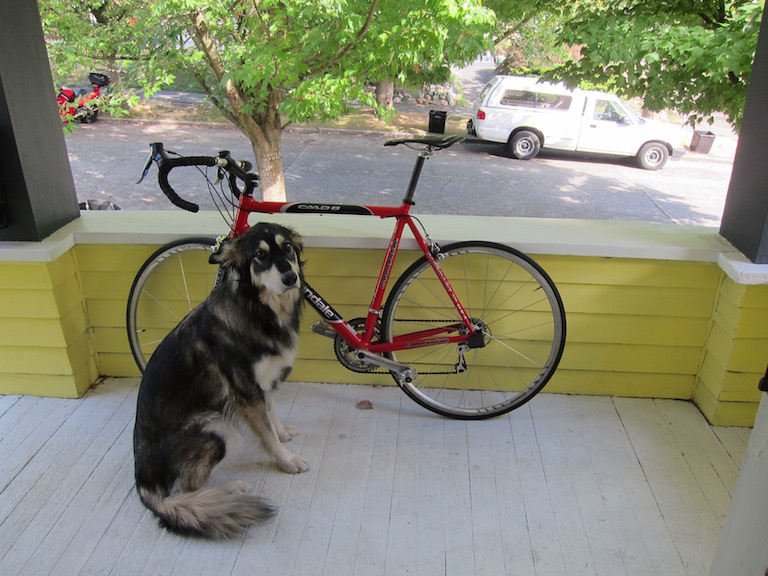

In [7]:
img.getWrappedImage()

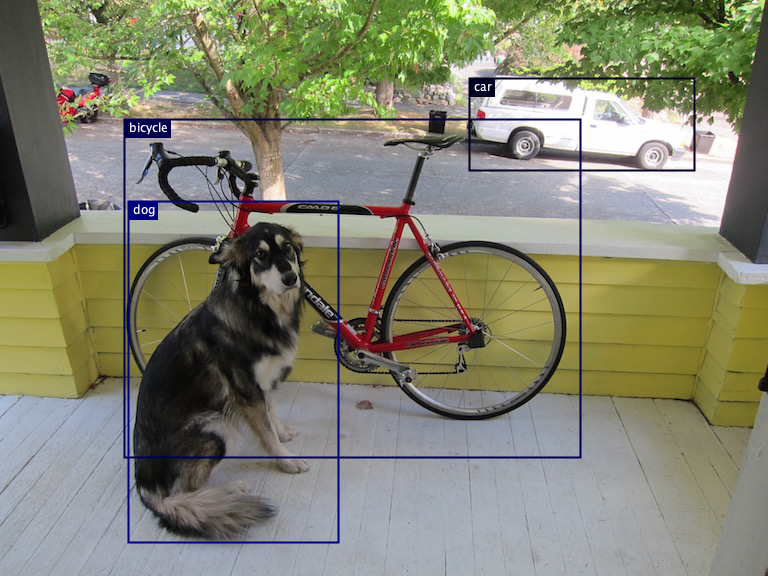

In [8]:
img.drawBoundingBoxes(detections);
img.getWrappedImage()